In [36]:
# Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
import joblib

  ## Load the Data

In [37]:
df = pd.read_csv('athlete_events.csv')

## Inspect the Data

In [38]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## Scrubbing the Data

In [39]:
# Check for missing values
print(df.isnull().sum())

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64


## Fill in the missing values

In [40]:
# Fill missing values
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Height'].fillna(df['Height'].mean(), inplace=True)
df['Weight'].fillna(df['Weight'].mean(), inplace=True)
df['Medal'].fillna('No Medal', inplace=True)


In [41]:
# # Load the dataset
# df = pd.read_csv('https://raw.githubusercontent.com/pramodpaulk/OlympicsDSE/main/athlete_events.csv')

# Filter for UK athletes
df_uk = df[df['NOC'] == 'GBR']

# Convert the Year to decade
df_uk['Decade'] = (df_uk['Year'] // 10) * 10

# Get the total number of athletes for each decade
total_athletes = df_uk.groupby('Decade')['ID'].nunique()

# Get the total number of medals for each decade
total_medals = df_uk[df_uk['Medal'].notna()].groupby('Decade')['Medal'].count()

# Get the total number of male and female athletes for each decade
athletes_male = df_uk[df_uk['Sex'] == 'M'].groupby('Decade')['ID'].nunique()
athletes_female = df_uk[df_uk['Sex'] == 'F'].groupby('Decade')['ID'].nunique()

# Create a new dataframe
df_decade = pd.DataFrame({
    'Total': total_athletes,
    'Athletes_Male': athletes_male,
    'Athletes_Female': athletes_female,
    'Medals': total_medals
})

# Save the new dataset to a CSV file
df_decade.to_csv('uk_athletes_decade.csv')



/tmp/ipykernel_1586/580305474.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Decade'] = (df_uk['Year'] // 10) * 10


In [42]:
df.head()
# Taking randomsample of the data for further steps
sample_data = df.sample(frac=0.01, random_state=1) # This will give you a random 10% sample of your data.
df = sample_data
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
87425,44330,Gwon Jung-Hyeon,M,26.0,170.0,65.0,South Korea,KOR,1968 Summer,1968,Summer,Mexico City,Cycling,Cycling Men's Sprint,No Medal
232882,116813,Hiroshi Suzuki,M,36.0,173.0,81.0,Japan,JPN,2010 Winter,2010,Winter,Vancouver,Bobsleigh,Bobsleigh Men's Four,No Medal
108037,54622,Jaroslav Jebek,M,33.0,171.0,81.0,Slovakia,SVK,2004 Summer,2004,Summer,Athina,Cycling,Cycling Men's Keirin,No Medal
249841,125115,Lia Vanea,F,26.0,177.0,67.0,Romania,ROU,1964 Summer,1964,Summer,Tokyo,Volleyball,Volleyball Women's Volleyball,No Medal
140123,70349,Pentti Tapio Aleksi Linnosvuo (Lindroos-),M,27.0,182.0,79.0,Finland,FIN,1960 Summer,1960,Summer,Roma,Shooting,"Shooting Men's Free Pistol, 50 metres",No Medal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161474,81061,Stephen Mokoka,M,31.0,157.0,52.0,South Africa,RSA,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,"Athletics Men's 10,000 metres",No Medal
39295,20216,Chen Jinchu,M,26.0,181.0,69.0,China,CHN,1984 Summer,1984,Summer,Los Angeles,Fencing,"Fencing Men's Sabre, Team",No Medal
255847,128096,Diane Barclay Walker (-Allan),F,16.0,172.0,65.0,Great Britain,GBR,1972 Summer,1972,Summer,Munich,Swimming,Swimming Women's 400 metres Individual Medley,No Medal
11442,6250,Astrid C. Ayling (Hohl-),F,28.0,177.0,75.0,Great Britain,GBR,1980 Summer,1980,Summer,Moskva,Rowing,Rowing Women's Double Sculls,No Medal


In [43]:
# Get unique cities
unique_cities = df['City'].unique()
print(unique_cities)


['Mexico City' 'Vancouver' 'Athina' 'Tokyo' 'Roma' 'Rio de Janeiro'
 'Paris' 'Helsinki' 'Munich' 'Seoul' 'Albertville' 'Torino' 'London'
 'Montreal' 'Sapporo' 'Salt Lake City' 'Barcelona' 'Los Angeles'
 'Amsterdam' 'Beijing' 'Sydney' 'Atlanta' 'Lake Placid' 'Innsbruck'
 'Moskva' 'Stockholm' 'Nagano' 'Garmisch-Partenkirchen' 'Berlin'
 'Lillehammer' 'Sarajevo' 'Melbourne' 'Grenoble' 'Antwerpen' 'Sochi'
 'Chamonix' 'Oslo' 'Sankt Moritz' "Cortina d'Ampezzo" 'Calgary'
 'Squaw Valley' 'St. Louis']


In [44]:
# List of major UK cities
uk_cities = ['London', 'Manchester', 'Birmingham', 'Glasgow', 'Liverpool', 'Edinburgh', 'Sheffield', 'Bristol']

# Check if any UK cities are in the list of unique host cities
uk_host_cities = [city for city in uk_cities if city in unique_cities]
print(uk_host_cities)


['London']


In [45]:

# Filter out the data for UK athletes
uk_data = df[df['NOC'] == 'GBR']

# Filter out only the rows where the athlete won a medal in summer games
uk_medals = uk_data[(uk_data['Season'] == 'Summer') & (uk_data['Medal'].notna())]

# Count the number of each type of medal
medal_counts = uk_medals['Medal'].value_counts()

print("UK Summer Games Medal Counts:")
print(medal_counts)
medal_counts.reset_index().to_json('uk_medals.json', orient='records')

# Get the names and details of the athletes who won medals
athletes = uk_medals[['Name', 'Sport', 'Age', 'Sex', 'Event', 'Medal']]

print("\nUK Summer Games Medal Winning Athletes:")
# Remove any rows with NaN values
athletes = athletes.dropna()
print(athletes.head())
print('fafaf',athletes.isna().any().any())
# Round off the 'Age' column to the nearest integer
athletes['Age'] = athletes['Age'].round().astype(int)


athletes.reset_index().to_json('uk_athletes.json', orient='records')

UK Summer Games Medal Counts:
Medal
No Medal    86
Gold         8
Silver       8
Bronze       6
Name: count, dtype: int64

UK Summer Games Medal Winning Athletes:
                             Name       Sport   Age Sex   
201855     Nathan James Robertson   Badminton  27.0   M  \
223436       Charles Sydney Smith  Water Polo  45.0   M   
105780  Thomas Watkin "Tom" James      Rowing  28.0   M   
141183          James "Jim" Lloyd      Boxing  21.0   M   
59339        Sinead Marie Dudgeon   Athletics  24.0   F   

                                       Event     Medal  
201855               Badminton Men's Doubles  No Medal  
223436           Water Polo Men's Water Polo  No Medal  
105780            Rowing Men's Coxless Fours      Gold  
141183             Boxing Men's Welterweight    Bronze  
59339   Athletics Women's 400 metres Hurdles  No Medal  
fafaf False


In [46]:
import requests
from bs4 import BeautifulSoup

# Read your data
data = pd.read_json("uk_athletes.json")

# Get unique UK athlete names
uk_athlete_names = data["Name"].unique()

def get_info_from_wikipedia(athlete_name):
    response = requests.get(f'https://en.wikipedia.org/wiki/{athlete_name}')
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Attempt to get the first paragraph of the page
        p_tags = soup.find_all('p')
        if p_tags:
            return p_tags[0].text

    # Return None if the request was not successful or if no paragraph was found
    return None

# Dictionary to hold athlete hometown information
athlete_info = {}

# Loop through all athlete names
for name in uk_athlete_names:
    info = get_info_from_wikipedia(name.replace(" ", "_"))  # Replace spaces with underscores for the URL
    if info:
        athlete_info[name] = info

# Now, `athlete_info` is a dictionary where the keys are athlete names and the values are the first paragraph
# of their Wikipedia page
# athlete_info.reset_index().to_json('athlete_info.json', orient='records')
print('athleteinfo', athlete_info)

athleteinfo {'Nathan James Robertson': '\n', 'Charles Sydney Smith': '\n', 'Julian Davies': 'Julian Davies can refer to:\n', 'Ralph Harrison': '\nRalph Harrison (1748–1810) was an English nonconformist minister, composer[1] and tutor.\n', 'David Louis Ghilchik': '\n', 'Charles H. Brown': 'Charles or Charlie Brown may refer to:\n', 'Rowland Fernyhough': '\n', 'Yvonne McGregor': '\n', 'Natasha Perdue': '\n', 'Denis Horgan': '\n', 'Geoffrey Laws': '\n', 'Stuart Jardine': '\n', 'Victoria Brown': 'Victoria Brown may refer to:\n', 'William McClure': '\n', 'John Chester Paddick': "\nJohn Chester Paddick (born 31 August 1943 in Newcastle-under-Lyme, England) is a British athlete. In 1964, he represented Great Britain and Northern Ireland in the Tokyo Olympics in the men's 20 kilometre walk event and came 10th overall with a time of 1 hour, 33 minutes and 28.4 seconds. He was just under four minutes behind the winner, Ken Matthews.\n", 'Thomas Hopkins': 'Thomas Hopkins may refer to:\n', 'Michae

In [47]:
import pycountry_convert as pc
import pycountry

# Load the dataset
athletes = df

# Mapping NOC to country names
noc_country = pd.read_csv('noc_regions.csv')
noc_country = noc_country.drop('notes', axis=1)
athletes = athletes.merge(noc_country,
                          left_on='NOC',
                          right_on='NOC',
                          how='left')

# Create a function to get continent name from country name
def country_to_continent(country_name):
    try:
        if country_name == 'USA':
            country_name = 'United States'
        elif country_name == 'UK':
            country_name = 'United Kingdom'
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
        country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
        return country_continent_name
    except:
        return 'Unknown'  # if the country name doesn't match, return Unknown

# Apply the function to the 'Country' column
athletes['Continent'] = athletes['region'].apply(country_to_continent)

# Get the number of participants from each continent for each year
participants_per_continent_year = athletes.groupby(['Year', 'Continent']).size().reset_index(name='Participants')

# Save the results to a JSON file
participants_per_continent_year.to_json('participants_per_continent_year.json', orient='records')


In [48]:
# # Filter the dataset by gender
# uk_athletes_male = athletes[athletes['Sex'] == 'M']
# uk_athletes_female = athletes[athletes['Sex'] == 'F']

# # Find the top 5 male athletes
# top_5_male = uk_athletes_male.sort_values('Total_Medals', ascending=False).drop_duplicates('Name').head(5)

# # Find the top 5 female athletes
# top_5_female = uk_athletes_female.sort_values('Total_Medals', ascending=False).drop_duplicates('Name').head(5)

# # Concatenate the two dataframes
# top_10_athletes = pd.concat([top_5_male, top_5_female])
# top_10_athletes.to_json('top_10_athletes.json', orient='records')


In [49]:
# Make sure the dataset is loaded
uk_athletes = pd.read_json('uk_athletes.json')

# Count the number of each type of medal won by each athlete
uk_athletes['Gold_Medals'] = uk_athletes[uk_athletes['Medal'] == 'Gold'].groupby('Name')['Medal'].transform('count')
uk_athletes['Silver_Medals'] = uk_athletes[uk_athletes['Medal'] == 'Silver'].groupby('Name')['Medal'].transform('count')
uk_athletes['Bronze_Medals'] = uk_athletes[uk_athletes['Medal'] == 'Bronze'].groupby('Name')['Medal'].transform('count')

# Replace NaN values with 0
uk_athletes['Gold_Medals'].fillna(0, inplace=True)
uk_athletes['Silver_Medals'].fillna(0, inplace=True)
uk_athletes['Bronze_Medals'].fillna(0, inplace=True)

# Now, compute Total_Medals
uk_athletes['Total_Medals'] = uk_athletes['Gold_Medals'] + uk_athletes['Silver_Medals'] + uk_athletes['Bronze_Medals']

# Drop duplicates, we only need one row for each athlete
uk_athletes = uk_athletes.drop_duplicates('Name')

# Filter by gender and sort by total medals
top_5_male = uk_athletes[uk_athletes['Sex'] == 'M'].nlargest(5, 'Total_Medals')
top_5_female = uk_athletes[uk_athletes['Sex'] == 'F'].nlargest(5, 'Total_Medals')

# Concatenate the dataframes
top_10_athletes = pd.concat([top_5_male, top_5_female])

# Write the data to a JSON file
top_10_athletes.reset_index().to_json('top_10_athletes.json', orient='records')


In [50]:
# # Define the bins
# bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# # Bin the ages
# uk_medals['Age_Group'] = pd.cut(uk_medals['Age'], bins, labels=False)

# # Save the binned data
# uk_medals.reset_index().to_json('uk_medals_binned.json', orient='records')


In [51]:
# Load the dataset
df = pd.read_json("uk_athletes.json")

# Count the number of medals won by each athlete
medal_counts = df['Name'].value_counts()

# Get the top 10 athletes
top_athletes = medal_counts.nlargest(10)

# Get the details of the top 10 athletes from the original dataframe
top_athletes_details = df[df['Name'].isin(top_athletes.index)]

print(top_athletes_details)

     index                                  Name          Sport  Age Sex   
1   223436                  Charles Sydney Smith     Water Polo   45   M  \
8    32207  David George Brownlow Cecil Burghley      Athletics   23   M   
66  200937      Jan William Joslin "John" Rinkel      Athletics   23   M   
71  201732                 Ronald Nathan Roberts       Swimming   33   M   
72  147729     Frederick Granville "Fred" Mallin         Boxing   26   M   
73   30065                       George H. Brown        Sailing   26   M   
74   99424             Michael John Peter Howard        Fencing   31   M   
75   32206  David George Brownlow Cecil Burghley      Athletics   19   M   
76  255848          Fitzlloyd Dean "Fitz" Walker      Wrestling   21   M   
77   88915                      Denis W. Hallett  Weightlifting   26   M   
78  261700                           Barry Winch     Gymnastics   26   M   
84  223433                  Charles Sydney Smith     Water Polo   29   M   

           

In [52]:
# Define the bins
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Create bin labels
bin_labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]

# Bin the ages and create a new 'Age_Group_Label' attribute
uk_medals['Age_Group'] = pd.cut(uk_medals['Age'], bins, labels=False)
uk_medals['Age_Group_Label'] = pd.cut(uk_medals['Age'], bins, labels=bin_labels)

# Save the binned data
uk_medals.reset_index().to_json('uk_medals_binned.json', orient='records')


/tmp/ipykernel_1586/3108649343.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_medals['Age_Group'] = pd.cut(uk_medals['Age'], bins, labels=False)
/tmp/ipykernel_1586/3108649343.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uk_medals['Age_Group_Label'] = pd.cut(uk_medals['Age'], bins, labels=bin_labels)


In [53]:


# Filter out the data for UK athletes
uk_data = df[df['NOC'] == 'GBR']

# Filter out only the rows where the athlete won a medal in summer games
uk_medals = uk_data[(uk_data['Season'] == 'Summer') & (uk_data['Medal'].notna())]

# Count the number of each type of medal
medal_counts = uk_medals['Medal'].value_counts()

print("UK Summer Games Medal Counts:")
print(medal_counts)
medal_counts.reset_index().to_json('uk_medals.json', orient='records')

# Get the names and details of the athletes who won medals
# We will also include the year of the games to distinguish between different games
athletes = uk_medals[['Name', 'Sport', 'Age', 'Sex', 'Event', 'Medal', 'Year']]

# Drop duplicates to get unique athletes who won medals
# We consider an athlete winning a medal in different years as a different entry
athletes = athletes.drop_duplicates()

print("\nUK Summer Games Medal Winning Athletes:")
print(athletes)
athletes.to_json('uk_athletes.json', orient='records')


KeyError: 'NOC'

## Encode the categorical variable 'Sex' and 'Sport'

In [ ]:
# Initialize LabelEncoders
le_sex = preprocessing.LabelEncoder()
le_sport = preprocessing.LabelEncoder()
le_team = preprocessing.LabelEncoder()
le_noc = preprocessing.LabelEncoder()
le_games = preprocessing.LabelEncoder()
le_season = preprocessing.LabelEncoder()
le_city = preprocessing.LabelEncoder()
le_event = preprocessing.LabelEncoder()
le_medal = preprocessing.LabelEncoder()

# Fit and transform the columns
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Sport'] = le_sport.fit_transform(df['Sport'])
df['Team'] = le_team.fit_transform(df['Team'])
df['NOC'] = le_noc.fit_transform(df['NOC'])
df['Games'] = le_games.fit_transform(df['Games'])
df['Season'] = le_season.fit_transform(df['Season'])
df['City'] = le_city.fit_transform(df['City'])
df['Event'] = le_event.fit_transform(df['Event'])
df['Medal'] = le_medal.fit_transform(df['Medal'])

# Save the encoders
joblib.dump(le_sex, 'le_sex.pkl')
joblib.dump(le_sport, 'le_sport.pkl')
joblib.dump(le_team, 'le_team.pkl')
joblib.dump(le_noc, 'le_noc.pkl')
joblib.dump(le_games, 'le_games.pkl')
joblib.dump(le_season, 'le_season.pkl')
joblib.dump(le_city, 'le_city.pkl')
joblib.dump(le_event, 'le_event.pkl')
joblib.dump(le_medal, 'le_medal.pkl')

['le_medal.pkl']

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
87425,44330,Gwon Jung-Hyeon,1,26.0,170.0,65.0,431,106,25,1968,0,20,18,244,2
232882,116813,Hiroshi Suzuki,1,36.0,173.0,81.0,223,101,47,2010,1,41,11,150,2
108037,54622,Jaroslav Jebek,1,33.0,171.0,81.0,416,183,44,2004,0,3,18,237,2
249841,125115,Lia Vanea,0,26.0,177.0,67.0,378,161,23,1964,0,39,60,643,2
140123,70349,Pentti Tapio Aleksi Linnosvuo (Lindroos-),1,27.0,182.0,79.0,151,65,21,1960,0,28,45,457,2


In [ ]:
# Check for missing values
print(df.isnull().sum())

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64


## Detecing Outliers in age, height and weight variables

## Using Box Plot

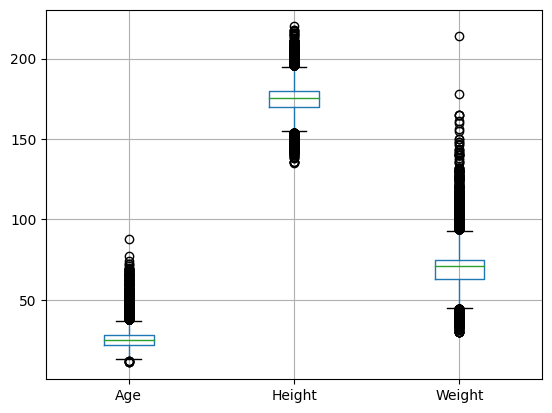

In [ ]:
# Box plot
df.boxplot(column=['Age', 'Height', 'Weight'])
plt.show()


In [ ]:

# Calculate Z-scores to identify outliers in a dataset.
z_scores = np.abs(stats.zscore(df[['Age', 'Height', 'Weight']]))

# Identify outliers
outliers = (z_scores > 3).any(axis=1)

# Display outliers
print(df[outliers])


            ID                                      Name  Sex   Age   
223436  112212                      Charles Sydney Smith    1  45.0  \
61596    31538                         Kameliya Eftimova    0  14.0   
53756    27569                               Deng Linlin    0  20.0   
70517    35895                Ariel Mauricio Flores Gmez    1  31.0   
243645  122020           Georges Auguste Ernest Trombert    1  45.0   
...        ...                                       ...  ...   ...   
190093   95476                     Daniel Mateusz Pliski    1  29.0   
50224    25839                Dominique d'Esm (-Gerbaud)    0  50.0   
97318    49261  Ludwig Fritz Karl Emil Heinrich Hohlwein    1  62.0   
188094   94490                          Owen D. Phillips    1  66.0   
156996   78863                            Bruce Meredith    1  51.0   

           Height      Weight  Team  NOC  Games  Year  Season  City  Sport   
223436  186.00000  105.000000   178   71      7  1924       0    26  

## Ensure that all data types are appropriate for each column in the above dataset

In [ ]:
# Check data types
print(df.dtypes)

ID          int64
Name       object
Sex         int64
Age       float64
Height    float64
Weight    float64
Team        int64
NOC         int64
Games       int64
Year        int64
Season      int64
City        int64
Sport       int64
Event       int64
Medal       int64
dtype: object


## Check for Duplicate rows

In [ ]:
# Check for duplicate rows
print("Number of duplicate rows: ", df.duplicated().sum())

Number of duplicate rows:  30


In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Check the number of rows after removing duplicates
print("Number of rows after removing duplicates: ", df.shape[0])

Number of rows after removing duplicates:  24370


## EXPLORE

## Descriptive statistics

In [ ]:
print(df.describe())

                  ID           Sex           Age        Height        Weight   
count   24370.000000  24370.000000  24370.000000  24370.000000  24370.000000  \
mean    68060.308740      0.728724     25.570002    175.313371     70.670136   
std     39117.163377      0.444627      6.287739      9.265276     12.639251   
min         2.000000      0.000000     11.000000    135.000000     30.000000   
25%     34372.500000      0.000000     22.000000    170.000000     63.000000   
50%     67919.000000      1.000000     25.000000    175.338970     70.702393   
75%    101775.500000      1.000000     28.000000    180.000000     75.000000   
max    135561.000000      1.000000     88.000000    220.000000    214.000000   

               Team           NOC         Games          Year        Season   
count  24370.000000  24370.000000  24370.000000  24370.000000  24370.000000  \
mean     258.522610    106.544194     31.384776   1978.177760      0.176364   
std      157.383364     62.186860     13.6

## Visualisations

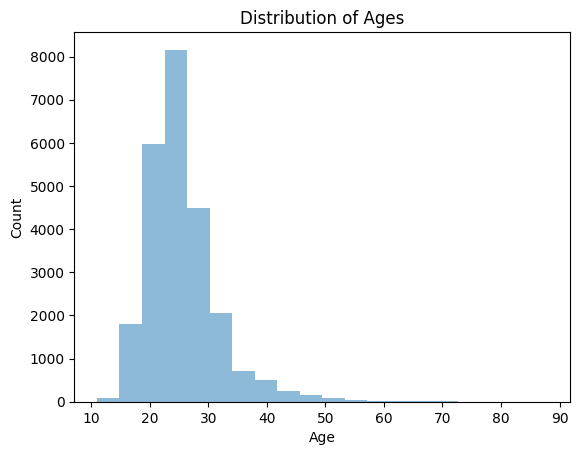

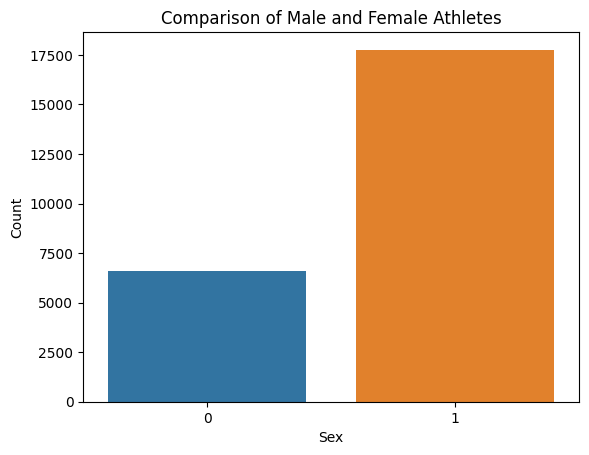

In [ ]:
# Histogram of ages
plt.hist(df['Age'], bins=20, alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Ages')
plt.show()

# Bar chart of sexes
sns.countplot(x='Sex', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Comparison of Male and Female Athletes')
plt.show()

## Data Exploration

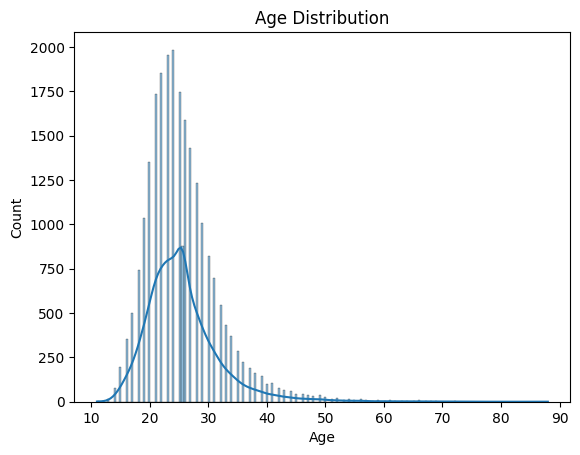

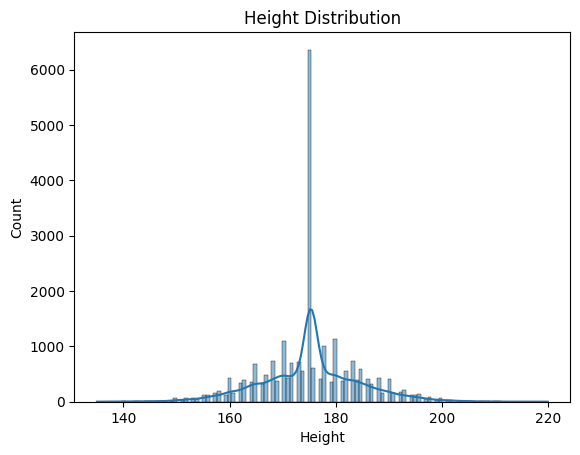

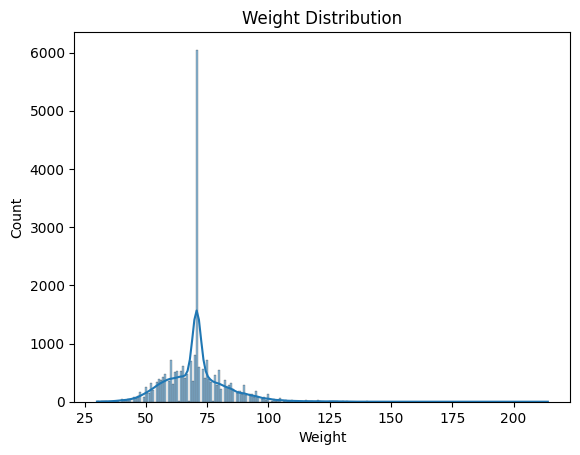

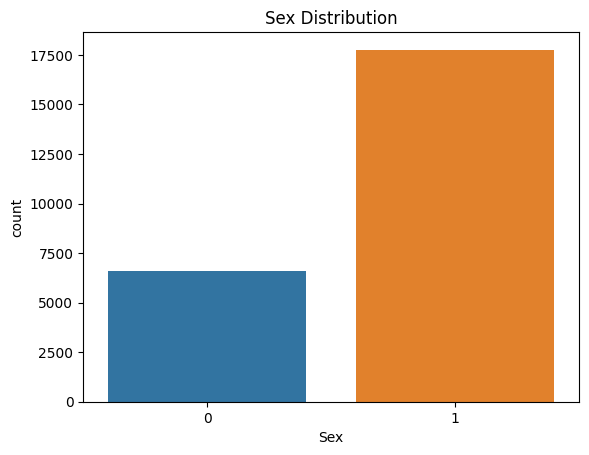

In [ ]:
# Visualising distributions of predictor variables.
# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Height distribution
sns.histplot(df['Height'], kde=True)
plt.title('Height Distribution')
plt.show()

# Weight distribution
sns.histplot(df['Weight'], kde=True)
plt.title('Weight Distribution')
plt.show()

# Sex distribution
sns.countplot(x='Sex', data=df)
plt.title('Sex Distribution')
plt.show()


## Feature Engineering
Based on the exploratory analysis, we can come up with some new features that might be helpful for our model. For instance, the Body Mass Index (BMI) could be a meaningful variable.

In [ ]:
# Create 'BMI' feature
df['BMI'] = df['Weight'] / ((df['Height']/100) ** 2)

In [ ]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
87425,44330,Gwon Jung-Hyeon,1,26.0,170.0,65.0,431,106,25,1968,0,20,18,244,2,22.491349
232882,116813,Hiroshi Suzuki,1,36.0,173.0,81.0,223,101,47,2010,1,41,11,150,2,27.064052
108037,54622,Jaroslav Jebek,1,33.0,171.0,81.0,416,183,44,2004,0,3,18,237,2,27.700831
249841,125115,Lia Vanea,0,26.0,177.0,67.0,378,161,23,1964,0,39,60,643,2,21.385936
140123,70349,Pentti Tapio Aleksi Linnosvuo (Lindroos-),1,27.0,182.0,79.0,151,65,21,1960,0,28,45,457,2,23.849777


In [ ]:
# import pandas as pd
# import pycountry
# import pycountry_convert as pc


# # Remove rows with no medals
# df = df[df['Medal'].notna()]

# # Load the NOC regions dataset
# noc_regions = pd.read_csv('https://raw.githubusercontent.com/pramodpaulk/OlympicsDSE/main/noc_regions.csv')

# # Merge the two dataframes on the 'NOC' column
# df = pd.merge(df, noc_regions, on='NOC')

# def country_to_continent(country_name):
#     try:
#         # Get country alpha_2 code
#         country_alpha2 = pycountry.countries.get(name=country_name).alpha_2
#         # Get continent code from country alpha_2 code
#         continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
#         # Get continent name from continent code
#         continent_name = pc.convert_continent_code_to_continent_name(continent_code)
#         # Combine North and South America into one category "America"
#         if continent_name in ["North America", "South America"]:
#             continent_name = "America"
#     except:
#         continent_name = 'Unknown'
#     return continent_name

# # Create a new column for continent
# df['Continent'] = df['region'].apply(country_to_continent)

# # Pivot the data by 'Medal' column
# medals_by_continent = df.pivot_table(index='Continent', columns='Medal', aggfunc='size', fill_value=0)

# print(medals_by_continent)
# medals_by_continent.reset_index().to_json('medals_by_continent.json', orient='records')


In [ ]:
import geopandas as gpd

# Load the world shapefile (you need to download it first)
world = gpd.read_file('ne_10m_admin_0_countries.shp')

# print(world.head())

# Load the mapping from countries to continents
country_to_continent = pd.read_csv('Countries-Continents.csv')

# Merge the world GeoDataFrame with the country_to_continent DataFrame
merged = world.merge(country_to_continent, left_on='ADMIN', right_on='Country Code')

print('merged-head',merged.head())


# Dissolve countries into continents
continents = merged.dissolve(by='Continent')

# Save the continents GeoDataFrame to a new shapefile
continents.to_file('continents.shp')


merged-head         featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL   
0  Admin-0 country          0          2  Indonesia    IDN         0      2  \
1  Admin-0 country          0          3   Malaysia    MYS         0      2   
2  Admin-0 country          0          2      Chile    CHL         0      2   
3  Admin-0 country          0          3    Bolivia    BOL         0      2   
4  Admin-0 country          0          2       Peru    PER         0      2   

                TYPE TLC      ADMIN  ... FCLASS_PL  FCLASS_GR FCLASS_IT   
0  Sovereign country   1  Indonesia  ...       NaN        NaN       NaN  \
1  Sovereign country   1   Malaysia  ...       NaN        NaN       NaN   
2  Sovereign country   1      Chile  ...       NaN        NaN       NaN   
3  Sovereign country   1    Bolivia  ...       NaN        NaN       NaN   
4  Sovereign country   1       Peru  ...       NaN        NaN       NaN   

  FCLASS_NL  FCLASS_SE FCLASS_BD FCLASS_UA   
0       NaN     

/tmp/ipykernel_1359/2854970058.py:21: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  continents.to_file('continents.shp')


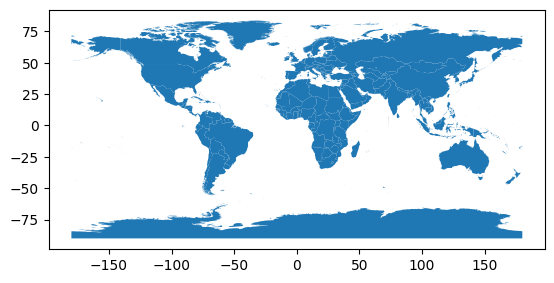

In [ ]:
# Load shapefile
gdf = gpd.read_file('ne_10m_admin_0_countries.shp')

# Plot data
gdf.plot()
plt.show()

In [ ]:

# Load shapefile
gdf = gpd.read_file('continents.shp')

# Convert to GeoJSON
gdf.to_file('continents.geojson', driver='GeoJSON')


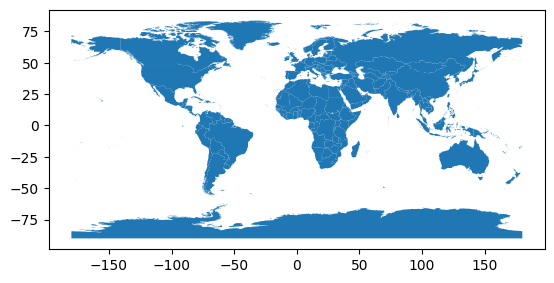

In [ ]:
# Load shapefile
gdf = gpd.read_file('ne_10m_admin_0_countries_gbr.shp')

# Plot data
gdf.plot()
plt.show()

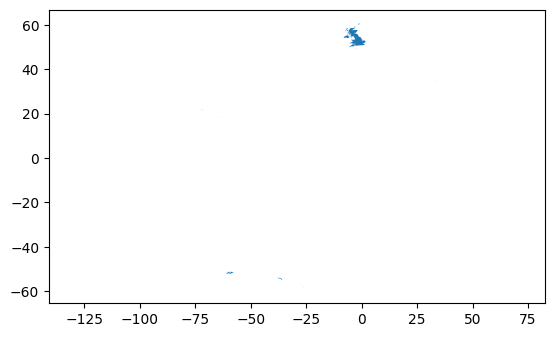

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load shapefile
gdf = gpd.read_file('ne_10m_admin_0_countries_gbr.shp')

# Filter to only keep UK
gdf_uk = gdf[gdf['SOVEREIGNT'] == 'United Kingdom']

# Plot UK
gdf_uk.plot()
plt.show()


In [ ]:
# Save UK GeoJSON
gdf_uk.to_file("uk.geojson", driver='GeoJSON')

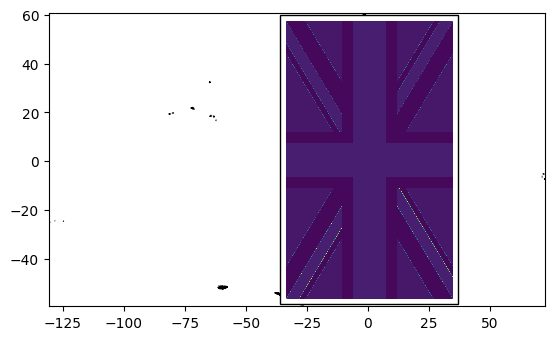

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

# Load the UK GeoJSON data
uk = gpd.read_file('uk.geojson')

# Create the figure and axes
fig, ax = plt.subplots()

# Set the axes limits to the UK bounds
minx, miny, maxx, maxy = uk.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)

# Plot the UK map
uk.plot(ax=ax, color='none', edgecolor='black')

# Load the UK flag image
img = Image.open('uk_flag.png')
imagebox = OffsetImage(img, zoom=0.2)

# Create an AnnotationBbox
ab = AnnotationBbox(imagebox, (0.5, 0.5))

# Add the AnnotationBbox to the axes
ax.add_artist(ab)

# Display the plot
plt.show()



In [ ]:

# Filter out the data for UK athletes
uk_data = df[df['NOC'] == 'GBR']

# Filter out only the rows where the athlete won a medal
uk_medals = uk_data.dropna(subset=['Medal'])

# Count the number of each type of medal
medal_counts = uk_medals['Medal'].value_counts()

print("UK Medal Counts:")
print(medal_counts)
medal_counts.reset_index().to_json('uk_medals.json', orient='records')


# Get the names and details of the athletes who won medals
athletes = uk_medals[['Name', 'Sport', 'Age', 'Sex', 'Event', 'Medal']]

print("\nUK Medal Winning Athletes:")
print(athletes)


UK Medal Counts:
Series([], Name: count, dtype: int64)

UK Medal Winning Athletes:
Empty DataFrame
Columns: [Name, Sport, Age, Sex, Event, Medal]
Index: []


In [ ]:


# Filter out the data for UK athletes
uk_data = df[df['NOC'] == 'GBR']

# Filter out only the rows where the athlete won a medal in summer games
uk_medals = uk_data[(uk_data['Season'] == 'Summer') & (uk_data['Medal'].notna())]

# Count the number of each type of medal
medal_counts = uk_medals['Medal'].value_counts()

print("UK Summer Games Medal Counts:")
print(medal_counts)
medal_counts.reset_index().to_json('uk_medals.json', orient='records')

# Get the names and details of the athletes who won medals
athletes = uk_medals[['Name', 'Sport', 'Age', 'Sex', 'Event', 'Medal']]

print("\nUK Summer Games Medal Winning Athletes:")
print(athletes)
athletes.reset_index().to_json('uk_athletes.json', orient='records')


UK Summer Games Medal Counts:
Series([], Name: count, dtype: int64)

UK Summer Games Medal Winning Athletes:
Empty DataFrame
Columns: [Name, Sport, Age, Sex, Event, Medal]
Index: []


In [ ]:
# Taking randomsample of the data for further steps
sample_data = df.sample(frac=0.01, random_state=1) # This will give you a random 10% sample of your data.
df = sample_data
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
155353,77990,Gavin Meadows,1,26.000000,191.00000,82.000000,178,71,44,2004,0,3,52,580,2,22.477454
42047,21679,Sorana Mihaela Crstea,0,22.000000,175.00000,63.000000,378,161,48,2012,0,17,56,635,2,20.571429
64278,32923,Alfred Eriksen,1,33.000000,175.33897,70.702393,330,144,17,1952,0,13,21,289,2,22.997319
181124,91034,Aleksey Ivanovich Panfili,1,38.000000,198.00000,98.000000,229,102,48,2012,0,17,61,644,2,24.997449
4393,2506,Denis Sergeyevich Alekseyev,1,20.000000,185.00000,76.000000,383,163,46,2008,0,6,5,69,2,22.205990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174777,87797,Helmut Oblinger,1,39.000000,180.00000,70.000000,30,13,48,2012,0,17,13,190,2,21.604938
10937,5975,Rafa Augustyn,1,32.000000,180.00000,82.000000,359,156,50,2016,0,27,5,75,2,25.308642
216442,108659,Zeki ensan,1,25.556898,178.00000,71.000000,485,198,21,1960,0,28,23,307,2,22.408787
131682,66269,Jason Grgory Lamy-Chappuis,1,23.000000,178.00000,65.000000,153,66,47,2010,1,41,37,382,1,20.515086


In [ ]:
#  const centers = [
#         {x: 360, y: 300, color: "blue", continent: "Europe"},
#         {x: 480, y: 420, color: "yellow", continent: "Asia"},
#         {x: 600, y: 300, color: "black", continent: "Africa"},
#         {x: 720, y: 420, color: "green", continent: "Oceania"},
#         {x: 840, y: 300, color: "red", continent: "America"}
#         ];